In [1]:
# Importing numpy, pandas for Data Manupulation
import numpy as np
import pandas as pd

#Importing matplotlib & seaborn for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Import sklearn for Model Building
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

#For MSE & RMSE
from sklearn.metrics import mean_squared_error, r2_score

#For train & test
from sklearn.model_selection import train_test_split

%matplotlib inline



### Reading csv file Historical_wildfires: 

In [2]:
#Contains Estimated Fire Area for training the Model
df_wildfires=pd.read_csv("Historical_Wildfires_BASE4.csv")

df_wildfires.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [3]:
#To check the Data Types
df_wildfires.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

### Using Transpose of the Array of shape (X, Y) to change the shape (Y, X)

In [4]:
df_wildfires.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Estimated_fire_area,26689.0,143.771912,313.349568,1.0,8.820000,38.241667,146.412857,10120.943170
Mean_estimated_fire_brightness,26689.0,319.706604,8.886413,290.7,313.963044,319.838044,325.465217,381.950000
Mean_estimated_fire_radiative_power,26689.0,83.679701,67.788523,0.0,44.118182,67.117143,103.152381,2178.600000
Mean_confidence,26689.0,87.579269,4.374162,76.0,85.000000,87.781250,90.500000,100.000000
Std_confidence,24449.0,7.229078,1.997452,0.0,6.687146,7.707661,8.239279,16.970563
Var_confidence,24449.0,56.249225,25.927542,0.0,44.717927,59.408040,67.885714,288.000000
Count,26689.0,71.824272,150.507579,1.0,5.000000,20.000000,74.000000,3954.000000


In [5]:
#Tofind the Number of Records & Regions in the following format
print("Number of records: {}".format(len(df_wildfires)))
print("Number of regions: {}\n".format(len(df_wildfires['Region'].unique())))
print(df_wildfires['Region'].unique())

Number of records: 26689
Number of regions: 7

['NSW' 'NT' 'QL' 'SA' 'TA' 'VI' 'WA']


In [6]:
###Converting DATE Column to datetime
df_wildfires['Date'] = pd.to_datetime(df_wildfires['Date'])
print("Minimum Date: {}".format(df_wildfires['Date'].min()))
print("Maximum Date: {}".format(df_wildfires['Date'].max()))

Minimum Date: 2005-01-01 00:00:00
Maximum Date: 2021-01-15 00:00:00


In [7]:
#Null values checking, if any...
df_wildfires.isna().sum()

Region                                    0
Date                                      0
Estimated_fire_area                       0
Mean_estimated_fire_brightness            0
Mean_estimated_fire_radiative_power       0
Mean_confidence                           0
Std_confidence                         2240
Var_confidence                         2240
Count                                     0
Replaced                                  0
dtype: int64

In [8]:
#To find reason behind NULL values
df_wildfires.loc[df_wildfires.Std_confidence.isna(), :]

df_wildfires.loc[df_wildfires.Var_confidence.isna(), :]

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
48,NSW,2005-02-26,1.00,303.15,8.0,79.0,NaN,NaN,1,R
149,NSW,2005-06-12,1.00,302.55,17.9,79.0,NaN,NaN,1,R
154,NSW,2005-06-18,5.27,301.30,71.9,77.0,NaN,NaN,1,R
157,NSW,2005-06-25,9.60,300.70,145.9,76.0,NaN,NaN,1,R
163,NSW,2005-07-09,2.80,294.65,37.8,79.0,NaN,NaN,1,R
...,...,...,...,...,...,...,...,...,...,...
26541,WA,2020-08-13,1.10,320.35,27.1,83.0,NaN,NaN,1,N
26542,WA,2020-08-14,1.00,302.15,15.8,77.0,NaN,NaN,1,N
26545,WA,2020-08-20,1.92,326.85,86.2,92.0,NaN,NaN,1,N
26547,WA,2020-08-22,2.47,321.10,43.9,79.0,NaN,NaN,1,N


In [9]:
#Cross Checking while std_confidence & var_confidence is NaN
df_wildfires.loc[(df_wildfires['Std_confidence'].isna()) & (df_wildfires['Var_confidence'].isna()), ['Count']].drop_duplicates().reset_index(drop=True)

,Count
0,1


### From the Standard Deviation-std() and Variance Confidence-var() values that are null due to the Count value is equals to 1. 
### Count 1 shows that there was 1 pixel that represents other values. 

In [10]:
###So, lets fill these NULL values with zeros
df_wildfires.loc[df_wildfires['Std_confidence'].isna(), 'Std_confidence'] = 0
df_wildfires.loc[df_wildfires['Var_confidence'].isna(), 'Var_confidence'] = 0


df_wildfires

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,2005-01-04,8.680000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,2005-01-05,16.611250,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,2005-01-06,5.520000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,2005-01-07,6.264000,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,2005-01-08,5.400000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R
...,...,...,...,...,...,...,...,...,...,...
26684,WA,2021-01-11,9.660000,320.933333,36.300000,85.666667,5.391351,29.066667,6,N
26685,WA,2021-01-12,9.011429,325.292857,32.514286,85.142857,8.254869,68.142857,7,N
26686,WA,2021-01-13,11.555556,333.033333,66.233333,91.000000,8.930286,79.750000,9,N
26687,WA,2021-01-14,4.410000,321.612500,24.500000,92.750000,8.845903,78.250000,4,N


In [11]:
region = df_wildfires['Region'].unique()
number_regions = region.shape[0]
total_regions = "\n".join(region.tolist())
print("These are {} the unique regions for Historical Wildfires:\n\n{}".format(number_regions, total_regions))

These are 7 the unique regions for Historical Wildfires:

NSW
NT
QL
SA
TA
VI
WA


### Drop duplicates and reset the index to check the total records in data

In [12]:
# Duplicates removing & Reset index
df_wildfires.drop_duplicates(inplace=True)

df_wildfires.reset_index(drop=True, inplace=True)

df_wildfires

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,2005-01-04,8.680000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,2005-01-05,16.611250,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,2005-01-06,5.520000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,2005-01-07,6.264000,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,2005-01-08,5.400000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R
...,...,...,...,...,...,...,...,...,...,...
26684,WA,2021-01-11,9.660000,320.933333,36.300000,85.666667,5.391351,29.066667,6,N
26685,WA,2021-01-12,9.011429,325.292857,32.514286,85.142857,8.254869,68.142857,7,N
26686,WA,2021-01-13,11.555556,333.033333,66.233333,91.000000,8.930286,79.750000,9,N
26687,WA,2021-01-14,4.410000,321.612500,24.500000,92.750000,8.845903,78.250000,4,N


In [13]:
# Now, number of records the in following format: 
n_rows, n_cols = df_wildfires.shape
print("Total Records:\t{}".format(n_rows))

Total Records:	26689


### Now,To Visualize the Estimated Fire Area

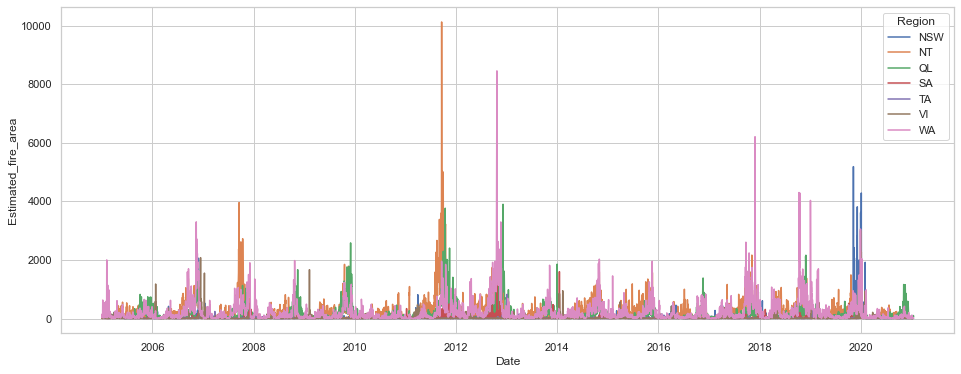

In [14]:
#For Historical_Wildfires
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
geo = sns.lineplot(x="Date", y="Estimated_fire_area",hue='Region', data=df_wildfires)

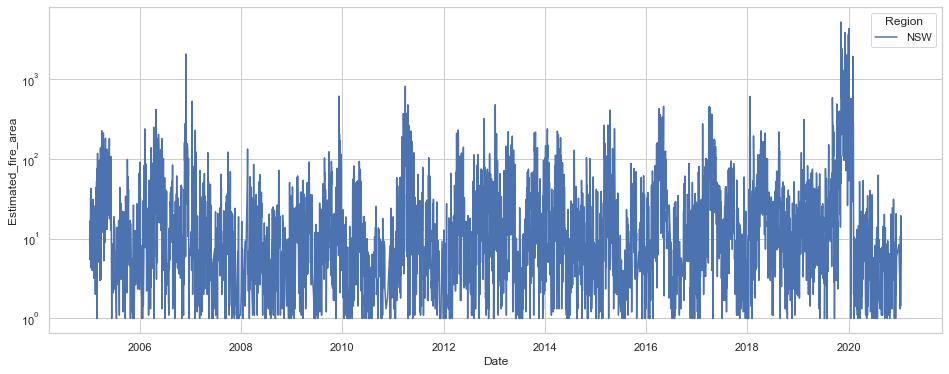

In [15]:
#Visualize Log wise Estimated Fire Area
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
geo = sns.lineplot(x="Date", y="Estimated_fire_area", hue='Region',
                 data=df_wildfires[df_wildfires['Region']=='NSW'])
geo.set_yscale("log")

Text(0, 0.5, 'Estimated Fire Area')

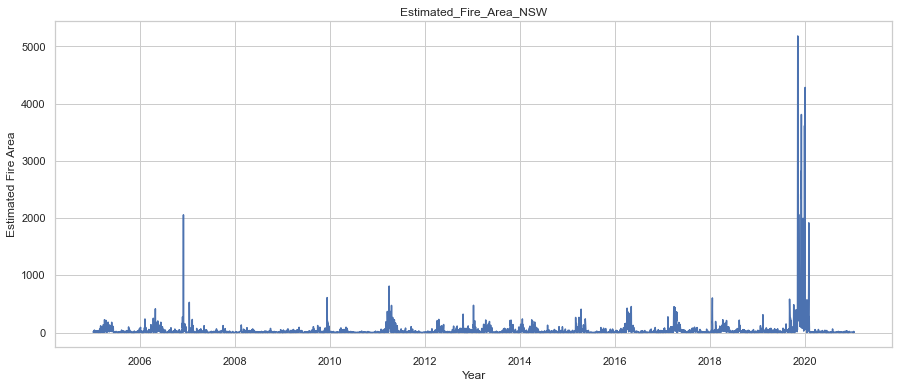

In [16]:
# To Visualize the Estimated  fire area for a specific region over time
fig, ax = plt.subplots(figsize = (15, 6))
df_NSW = df_wildfires[df_wildfires["Region"] == "NSW"]

sns.lineplot(df_NSW["Date"], df_NSW["Estimated_fire_area"])

ax.set_title("Estimated_Fire_Area_NSW")
ax.set_xlabel("Year")
ax.set_ylabel("Estimated Fire Area")



In [17]:
#Seasonality checking breaking Date into segments
df_NSW["day"] = df_NSW["Date"].dt.day
df_NSW["month"] = df_NSW["Date"].dt.month
df_NSW["year"] = df_NSW["Date"].dt.year


C:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

Text(0, 0.5, 'Fire Area - Seasonality')

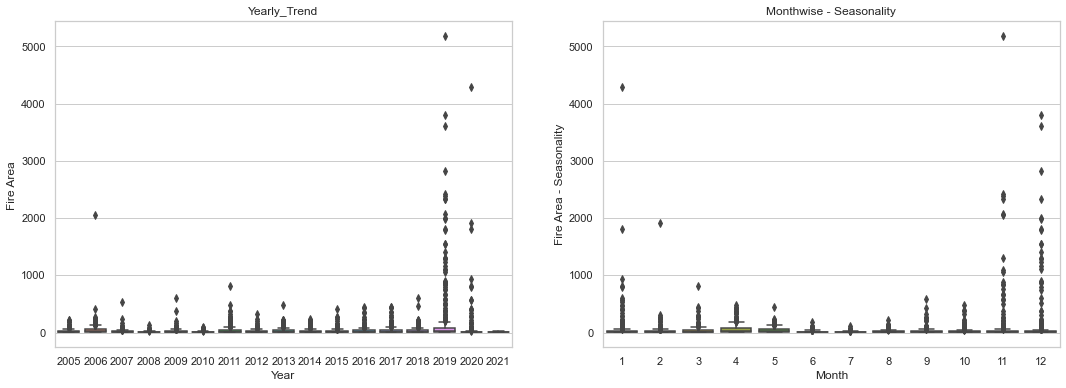

In [18]:
#Seasonality checking using Box plot for NSW
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

sns.boxplot(df_NSW["year"], df_NSW["Estimated_fire_area"], ax = ax[0])
ax[0].set_title("Yearly_Trend")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Fire Area ")

sns.boxplot(df_NSW["month"], df_NSW["Estimated_fire_area"], ax = ax[1])
ax[1].set_title("Monthwise - Seasonality")
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Fire Area - Seasonality")


### So, from the above Visualization of Historical_Wildfires Data it is shown that there is a Trend & Seasonality, Data is not Stationary 


# Now for the Historical_Weather Dataset:  

In [19]:
#Reading Data
df_weather=pd.read_csv("HistoricalWeather.csv")

df_weather.head()

,Date,Region,Parameter,count()[unit: km^2],min(),max(),mean(),variance()
0,2005-01-01,NSW,Precipitation,800234.348986,0.000000,1.836935,0.044274,0.028362
1,2005-01-01,NSW,RelativeHumidity,800234.348986,13.877194,80.522964,36.355567,253.559937
2,2005-01-01,NSW,SoilWaterContent,800234.348986,0.002245,0.414305,0.170931,0.007758
3,2005-01-01,NSW,SolarRadiation,800234.348986,14.515009,32.169781,26.749389,6.078587
4,2005-01-01,NSW,Temperature,800234.348986,14.485785,35.878704,27.341182,18.562212


In [20]:
#Converting Date column to datetime
df_weather["Date"] = pd.to_datetime(df_weather["Date"])
df_weather.head()


,Date,Region,Parameter,count()[unit: km^2],min(),max(),mean(),variance()
0,2005-01-01,NSW,Precipitation,800234.348986,0.000000,1.836935,0.044274,0.028362
1,2005-01-01,NSW,RelativeHumidity,800234.348986,13.877194,80.522964,36.355567,253.559937
2,2005-01-01,NSW,SoilWaterContent,800234.348986,0.002245,0.414305,0.170931,0.007758
3,2005-01-01,NSW,SolarRadiation,800234.348986,14.515009,32.169781,26.749389,6.078587
4,2005-01-01,NSW,Temperature,800234.348986,14.485785,35.878704,27.341182,18.562212


In [21]:
# Checking the info of Data
df_weather.info


<bound method DataFrame.info of              Date Region         Parameter  count()[unit: km^2]      min()  \
0      2005-01-01    NSW     Precipitation         8.002343e+05   0.000000   
1      2005-01-01    NSW  RelativeHumidity         8.002343e+05  13.877194   
2      2005-01-01    NSW  SoilWaterContent         8.002343e+05   0.002245   
3      2005-01-01    NSW    SolarRadiation         8.002343e+05  14.515009   
4      2005-01-01    NSW       Temperature         8.002343e+05  14.485785   
...           ...    ...               ...                  ...        ...   
245716 2021-01-09     WA  RelativeHumidity         2.528546e+06  11.286411   
245717 2021-01-09     WA  SoilWaterContent         2.528546e+06   0.000000   
245718 2021-01-09     WA    SolarRadiation         2.528546e+06  18.421680   
245719 2021-01-09     WA       Temperature         2.528546e+06  20.764585   
245720 2021-01-09     WA         WindSpeed         2.528546e+06   1.316897   

            max()     mean()  v

In [22]:
#DATA analysis
print("Number of records: {}".format(len(df_weather)))
print("Number of regions: {}\n".format(len(df_weather['Region'].unique())))
print(df_weather['Region'].unique())

Number of records: 245721
Number of regions: 7

['NSW' 'NT' 'QL' 'SA' 'TA' 'VI' 'WA']


In [23]:
df_weather.head()

,Date,Region,Parameter,count()[unit: km^2],min(),max(),mean(),variance()
0,2005-01-01,NSW,Precipitation,800234.348986,0.000000,1.836935,0.044274,0.028362
1,2005-01-01,NSW,RelativeHumidity,800234.348986,13.877194,80.522964,36.355567,253.559937
2,2005-01-01,NSW,SoilWaterContent,800234.348986,0.002245,0.414305,0.170931,0.007758
3,2005-01-01,NSW,SolarRadiation,800234.348986,14.515009,32.169781,26.749389,6.078587
4,2005-01-01,NSW,Temperature,800234.348986,14.485785,35.878704,27.341182,18.562212


In [24]:
df_weather.describe().T

,count,mean,std,min,25%,50%,75%,max
count()[unit: km^2],245721.0,1.100786e+06,795500.527042,67785.261409,2.294532e+05,991315.104985,1.730605e+06,2.528546e+06
min(),245721.0,9.539645e+00,14.551590,-5.055067,7.669441e-07,2.373876,1.412145e+01,9.027615e+01
max(),245721.0,2.726031e+01,31.343030,0.000000,5.506519e+00,15.578515,3.215088e+01,5.098331e+02
mean(),245721.0,1.669513e+01,21.027521,0.000000,3.420428e-01,6.726836,2.506044e+01,9.595300e+01
variance(),245721.0,3.918512e+01,95.053784,0.000000,3.461215e-01,2.964714,1.663401e+01,2.064897e+03


In [25]:
#Checking for Missing values
df_weather.isna().sum()

Date                   0
Region                 0
Parameter              0
count()[unit: km^2]    0
min()                  0
max()                  0
mean()                 0
variance()             0
dtype: int64

In [26]:
#Checking for Data Type
df_weather.dtypes

Date                   datetime64[ns]
Region                         object
Parameter                      object
count()[unit: km^2]           float64
min()                         float64
max()                         float64
mean()                        float64
variance()                    float64
dtype: object

In [27]:
#Renaming the Columns
df_weather = df_weather.rename(columns={"count()[unit: km^2]": "Area", "min()": "Min",
                                       "max()": "Max", "mean()": "Mean", "variance()": "Variance"})

df_weather['Date'] = pd.to_datetime(df_weather['Date'])

df_weather.head()

,Date,Region,Parameter,Area,Min,Max,Mean,Variance
0,2005-01-01,NSW,Precipitation,800234.348986,0.000000,1.836935,0.044274,0.028362
1,2005-01-01,NSW,RelativeHumidity,800234.348986,13.877194,80.522964,36.355567,253.559937
2,2005-01-01,NSW,SoilWaterContent,800234.348986,0.002245,0.414305,0.170931,0.007758
3,2005-01-01,NSW,SolarRadiation,800234.348986,14.515009,32.169781,26.749389,6.078587
4,2005-01-01,NSW,Temperature,800234.348986,14.485785,35.878704,27.341182,18.562212


In [28]:
df_weather.head()

,Date,Region,Parameter,Area,Min,Max,Mean,Variance
0,2005-01-01,NSW,Precipitation,800234.348986,0.000000,1.836935,0.044274,0.028362
1,2005-01-01,NSW,RelativeHumidity,800234.348986,13.877194,80.522964,36.355567,253.559937
2,2005-01-01,NSW,SoilWaterContent,800234.348986,0.002245,0.414305,0.170931,0.007758
3,2005-01-01,NSW,SolarRadiation,800234.348986,14.515009,32.169781,26.749389,6.078587
4,2005-01-01,NSW,Temperature,800234.348986,14.485785,35.878704,27.341182,18.562212


In [29]:
#Checking for Unique Area
df_weather['Area'].unique()

array([ 800234.34898604, 1357560.87023056, 1730605.04292781,
        991315.10498463,   67785.26140857,  229453.17685432,
       2528545.65936048])

In [30]:
#Re-arranging Data
df_pivot = df_weather.pivot_table(values=['Min','Max','Mean','Variance'], index=['Date','Region'],
                                  columns=['Parameter'])

In [31]:
#Re-Set Index
df_pivot.reset_index(inplace=True)

In [32]:
#Rename Columns
df_pivot.columns = [col[0] if not(col[1]) else '{1}_{0}'.format(*col) for col in df_pivot.columns.values]

In [33]:
#Re-Arranging Columns & Data
params = df_pivot.columns.tolist()[3:]
params.sort()
weather_df = df_pivot[df_pivot.columns.tolist()[:3] + params].copy()
weather_df.head()

,Date,Region,Precipitation_Max,Precipitation_Mean,Precipitation_Min,Precipitation_Variance,RelativeHumidity_Max,RelativeHumidity_Mean,RelativeHumidity_Min,RelativeHumidity_Variance,...,SolarRadiation_Min,SolarRadiation_Variance,Temperature_Max,Temperature_Mean,Temperature_Min,Temperature_Variance,WindSpeed_Max,WindSpeed_Mean,WindSpeed_Min,WindSpeed_Variance
0,2005-01-01,NSW,1.836935,0.044274,0.000000,0.028362,80.522964,36.355567,13.877194,253.559937,...,14.515009,6.078587,35.878704,27.341182,14.485785,18.562212,7.670482,3.323550,1.354448,0.850048
1,2005-01-01,NT,315.266815,9.884958,0.000000,546.059262,95.683342,61.494675,14.558820,584.201131,...,2.518120,58.942658,38.136787,29.881492,24.179960,12.920252,9.704402,5.296892,1.840394,1.930014
2,2005-01-01,QL,74.452164,1.453053,0.000000,35.641257,95.898270,47.959364,14.443199,403.134377,...,6.033827,29.500832,37.047943,28.842866,20.951620,13.792599,7.675632,3.483753,1.106028,0.883048
3,2005-01-01,SA,3.193624,0.059078,0.000000,0.042837,81.980751,30.057683,10.618136,246.044713,...,17.861103,7.914246,38.326847,30.793675,14.095855,34.799336,10.044715,4.657538,2.023657,1.655908
4,2005-01-01,TA,13.604791,3.099497,0.003973,12.068597,81.501442,65.086764,43.906574,111.754034,...,20.742302,12.826400,16.228510,11.788805,6.686816,4.912013,11.432408,5.408138,1.995647,2.963118


In [34]:
n_rows, n_cols = weather_df.shape
print("There are total number of {} records in the following {} columns:\n".format(n_rows, n_cols))
print("\n".join(list(weather_df.columns)))

region = weather_df['Region'].unique()
total_regions = region.shape[0]
total_regions = "\n".join(region.tolist())
print("Following are:\n {} unique regions in Historical Weather Data:\n\n{}".format( total_regions, total_regions))

There are total number of 40971 records in the following 26 columns:

Date
Region
Precipitation_Max
Precipitation_Mean
Precipitation_Min
Precipitation_Variance
RelativeHumidity_Max
RelativeHumidity_Mean
RelativeHumidity_Min
RelativeHumidity_Variance
SoilWaterContent_Max
SoilWaterContent_Mean
SoilWaterContent_Min
SoilWaterContent_Variance
SolarRadiation_Max
SolarRadiation_Mean
SolarRadiation_Min
SolarRadiation_Variance
Temperature_Max
Temperature_Mean
Temperature_Min
Temperature_Variance
WindSpeed_Max
WindSpeed_Mean
WindSpeed_Min
WindSpeed_Variance
Following are:
 NSW
NT
QL
SA
TA
VI
WA unique regions in Historical Weather Data:

NSW
NT
QL
SA
TA
VI
WA


In [35]:
#NULL values in Weather Data:-
weather_df.isna().sum()

Date                          0
Region                        0
Precipitation_Max             7
Precipitation_Mean            7
Precipitation_Min             7
Precipitation_Variance        7
RelativeHumidity_Max         42
RelativeHumidity_Mean        42
RelativeHumidity_Min         42
RelativeHumidity_Variance    42
SoilWaterContent_Max          0
SoilWaterContent_Mean         0
SoilWaterContent_Min          0
SoilWaterContent_Variance     0
SolarRadiation_Max           14
SolarRadiation_Mean          14
SolarRadiation_Min           14
SolarRadiation_Variance      14
Temperature_Max              14
Temperature_Mean             14
Temperature_Min              14
Temperature_Variance         14
WindSpeed_Max                28
WindSpeed_Mean               28
WindSpeed_Min                28
WindSpeed_Variance           28
dtype: int64

In [36]:
###Whether the NULL values present in the arranged data taking Precipitation_mean
weather_df.loc[weather_df['Precipitation_Mean'].isna(), :]

,Date,Region,Precipitation_Max,Precipitation_Mean,Precipitation_Min,Precipitation_Variance,RelativeHumidity_Max,RelativeHumidity_Mean,RelativeHumidity_Min,RelativeHumidity_Variance,...,SolarRadiation_Min,SolarRadiation_Variance,Temperature_Max,Temperature_Mean,Temperature_Min,Temperature_Variance,WindSpeed_Max,WindSpeed_Mean,WindSpeed_Min,WindSpeed_Variance
36995,2019-06-22,NSW,NaN,NaN,NaN,NaN,91.814453,68.422677,47.983139,114.312088,...,5.427815,2.390587,13.923991,6.138674,-0.300265,4.957193,9.339998,2.914745,1.048711,0.670847
36996,2019-06-22,NT,NaN,NaN,NaN,NaN,74.113892,30.802208,17.733223,125.066021,...,12.637497,2.493807,25.157646,14.323231,7.124587,17.841910,9.785229,4.616783,2.790959,0.821780
36997,2019-06-22,QL,NaN,NaN,NaN,NaN,83.852173,46.585385,21.653999,136.242906,...,10.554407,2.541980,25.403965,11.880667,4.738083,22.149479,9.982671,3.428681,1.280596,1.266645
36998,2019-06-22,SA,NaN,NaN,NaN,NaN,90.240486,50.957245,22.742420,189.151252,...,6.261038,2.518352,13.625819,8.601456,2.367725,2.724242,8.605908,3.424624,1.245013,1.113020
36999,2019-06-22,TA,NaN,NaN,NaN,NaN,97.402702,86.778359,68.310066,38.487720,...,4.417063,1.139942,11.469337,4.574910,-0.214279,6.325362,6.195638,1.771625,0.696300,0.857406
37000,2019-06-22,VI,NaN,NaN,NaN,NaN,96.209885,84.582572,63.882984,41.199200,...,5.230695,1.509120,11.801810,5.001564,0.078639,3.685770,6.246301,2.101499,0.802938,0.361891
37001,2019-06-22,WA,NaN,NaN,NaN,NaN,98.127876,39.120916,14.851243,467.014533,...,2.460803,13.936414,24.897877,18.152780,11.241782,6.561743,8.518429,4.775665,2.197379,1.324167


### The above result shows there was no Precipitation in all 7 regions on 2019-06-22 

In [37]:
#Cross check with Original Data values
df_weather.loc[df_weather['Date'] == "2020-01-22", :]

,Date,Region,Parameter,Area,Min,Max,Mean,Variance
230853,2020-01-22,NSW,Precipitation,8.002343e+05,0.000000e+00,5.967301,0.213640,0.404594
230854,2020-01-22,NSW,RelativeHumidity,8.002343e+05,1.229429e+01,85.645912,30.035164,242.834928
230855,2020-01-22,NSW,SoilWaterContent,8.002343e+05,7.480431e-05,0.440737,0.191651,0.009701
230856,2020-01-22,NSW,SolarRadiation,8.002343e+05,1.731656e+01,32.546204,29.341842,9.550353
230857,2020-01-22,NSW,Temperature,8.002343e+05,2.101004e+01,36.072029,30.241324,12.499855
230858,2020-01-22,NSW,WindSpeed,8.002343e+05,1.475557e+00,9.580211,5.028284,2.258247
230859,2020-01-22,NT,Precipitation,1.357561e+06,0.000000e+00,48.940342,5.880419,63.631512
230860,2020-01-22,NT,RelativeHumidity,1.357561e+06,1.942725e+01,92.373390,65.183381,470.085491
230861,2020-01-22,NT,SoilWaterContent,1.357561e+06,4.687660e-08,0.503818,0.199145,0.020313
230862,2020-01-22,NT,SolarRadiation,1.357561e+06,5.715028e+00,30.808949,19.781162,54.182662


SO, it shows thet there was no rain on 2020-01-22

In [38]:
weather_df.isna().sum()

Date                          0
Region                        0
Precipitation_Max             7
Precipitation_Mean            7
Precipitation_Min             7
Precipitation_Variance        7
RelativeHumidity_Max         42
RelativeHumidity_Mean        42
RelativeHumidity_Min         42
RelativeHumidity_Variance    42
SoilWaterContent_Max          0
SoilWaterContent_Mean         0
SoilWaterContent_Min          0
SoilWaterContent_Variance     0
SolarRadiation_Max           14
SolarRadiation_Mean          14
SolarRadiation_Min           14
SolarRadiation_Variance      14
Temperature_Max              14
Temperature_Mean             14
Temperature_Min              14
Temperature_Variance         14
WindSpeed_Max                28
WindSpeed_Mean               28
WindSpeed_Min                28
WindSpeed_Variance           28
dtype: int64

In [39]:
weather_df.loc[weather_df['Temperature_Mean'].isna(), :]

df_weather.loc[df_weather['Date'] == "2014-02-08", :]

df_weather.loc[df_weather['Date'] == "2021-01-09", :]

,Date,Region,Parameter,Area,Min,Max,Mean,Variance
245679,2021-01-09,NSW,Precipitation,8.002343e+05,0.000000,6.146894,0.198091,3.589755e-01
245680,2021-01-09,NSW,RelativeHumidity,8.002343e+05,20.717522,92.532555,50.424479,3.611151e+02
245681,2021-01-09,NSW,SoilWaterContent,8.002343e+05,0.019197,0.474006,0.215550,1.353364e-02
245682,2021-01-09,NSW,SolarRadiation,8.002343e+05,17.610502,33.336090,28.877406,1.589722e+01
245683,2021-01-09,NSW,Temperature,8.002343e+05,14.319155,29.759024,23.284361,1.564700e+01
245684,2021-01-09,NSW,WindSpeed,8.002343e+05,0.642156,5.410566,3.302072,1.014775e+00
245685,2021-01-09,NT,Precipitation,1.357561e+06,0.000000,53.709724,1.775337,3.370128e+01
245686,2021-01-09,NT,RelativeHumidity,1.357561e+06,16.042603,85.693878,39.389902,4.758384e+02
245687,2021-01-09,NT,SoilWaterContent,1.357561e+06,0.000000,0.487288,0.110054,1.167785e-02
245688,2021-01-09,NT,SolarRadiation,1.357561e+06,15.094181,32.196629,28.266679,1.556181e+01


In [40]:
weather_df.isna().sum()

Date                          0
Region                        0
Precipitation_Max             7
Precipitation_Mean            7
Precipitation_Min             7
Precipitation_Variance        7
RelativeHumidity_Max         42
RelativeHumidity_Mean        42
RelativeHumidity_Min         42
RelativeHumidity_Variance    42
SoilWaterContent_Max          0
SoilWaterContent_Mean         0
SoilWaterContent_Min          0
SoilWaterContent_Variance     0
SolarRadiation_Max           14
SolarRadiation_Mean          14
SolarRadiation_Min           14
SolarRadiation_Variance      14
Temperature_Max              14
Temperature_Mean             14
Temperature_Min              14
Temperature_Variance         14
WindSpeed_Max                28
WindSpeed_Mean               28
WindSpeed_Min                28
WindSpeed_Variance           28
dtype: int64

In [41]:
# Checking Data types for each columns
weather_df.dtypes

Date                         datetime64[ns]
Region                               object
Precipitation_Max                   float64
Precipitation_Mean                  float64
Precipitation_Min                   float64
Precipitation_Variance              float64
RelativeHumidity_Max                float64
RelativeHumidity_Mean               float64
RelativeHumidity_Min                float64
RelativeHumidity_Variance           float64
SoilWaterContent_Max                float64
SoilWaterContent_Mean               float64
SoilWaterContent_Min                float64
SoilWaterContent_Variance           float64
SolarRadiation_Max                  float64
SolarRadiation_Mean                 float64
SolarRadiation_Min                  float64
SolarRadiation_Variance             float64
Temperature_Max                     float64
Temperature_Mean                    float64
Temperature_Min                     float64
Temperature_Variance                float64
WindSpeed_Max                   

In [42]:
# For Historical Wildfires Data - Number of records
n_rows, n_cols = df_wildfires.shape
print("Total Records:\t{}".format(n_rows))
df_wildfires.head()

Total Records:	26689


,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,2005-01-04,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,2005-01-05,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,2005-01-06,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,2005-01-07,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,2005-01-08,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [43]:
# For Historical Weather Data - Number of records
nf_rows, n_cols = weather_df.shape
print("Total Records:\t{}".format(n_rows))
weather_df.head()

Total Records:	26689


,Date,Region,Precipitation_Max,Precipitation_Mean,Precipitation_Min,Precipitation_Variance,RelativeHumidity_Max,RelativeHumidity_Mean,RelativeHumidity_Min,RelativeHumidity_Variance,...,SolarRadiation_Min,SolarRadiation_Variance,Temperature_Max,Temperature_Mean,Temperature_Min,Temperature_Variance,WindSpeed_Max,WindSpeed_Mean,WindSpeed_Min,WindSpeed_Variance
0,2005-01-01,NSW,1.836935,0.044274,0.000000,0.028362,80.522964,36.355567,13.877194,253.559937,...,14.515009,6.078587,35.878704,27.341182,14.485785,18.562212,7.670482,3.323550,1.354448,0.850048
1,2005-01-01,NT,315.266815,9.884958,0.000000,546.059262,95.683342,61.494675,14.558820,584.201131,...,2.518120,58.942658,38.136787,29.881492,24.179960,12.920252,9.704402,5.296892,1.840394,1.930014
2,2005-01-01,QL,74.452164,1.453053,0.000000,35.641257,95.898270,47.959364,14.443199,403.134377,...,6.033827,29.500832,37.047943,28.842866,20.951620,13.792599,7.675632,3.483753,1.106028,0.883048
3,2005-01-01,SA,3.193624,0.059078,0.000000,0.042837,81.980751,30.057683,10.618136,246.044713,...,17.861103,7.914246,38.326847,30.793675,14.095855,34.799336,10.044715,4.657538,2.023657,1.655908
4,2005-01-01,TA,13.604791,3.099497,0.003973,12.068597,81.501442,65.086764,43.906574,111.754034,...,20.742302,12.826400,16.228510,11.788805,6.686816,4.912013,11.432408,5.408138,1.995647,2.963118


### Merging  Wildfire's data with Weather data.

In [44]:
wildfires_weather_df = df_wildfires.merge(weather_df, how='left', on=['Date', 'Region'])
wildfires_weather_df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,SolarRadiation_Min,SolarRadiation_Variance,Temperature_Max,Temperature_Mean,Temperature_Min,Temperature_Variance,WindSpeed_Max,WindSpeed_Mean,WindSpeed_Min,WindSpeed_Variance
0,NSW,2005-01-04,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,...,7.576938,40.255460,28.945488,23.055527,12.495799,9.455474,7.364222,4.841764,1.401951,1.494301
1,NSW,2005-01-05,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,...,14.087289,29.763055,29.510120,22.425765,9.611800,13.352380,7.091141,4.014080,1.011328,1.043316
2,NSW,2005-01-06,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,...,12.310518,22.667707,26.982698,20.621405,9.024039,11.764178,9.905821,4.477879,0.930842,1.953685
3,NSW,2005-01-07,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,...,16.044561,6.949267,24.752069,19.632722,8.691216,7.940373,10.446799,4.017578,1.601724,1.102751
4,NSW,2005-01-08,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,...,15.209880,27.822830,26.472469,21.477315,10.821342,12.063971,6.671862,3.884550,1.167861,0.774612


In [45]:
vegetation_df =pd.read_csv("VegetationIndex.csv")
print("Read file: '{}'".format(df_wildfires))

vegetation_df.head()

Read file: '      Region       Date  Estimated_fire_area  Mean_estimated_fire_brightness  \
0        NSW 2005-01-04             8.680000                      312.266667   
1        NSW 2005-01-05            16.611250                      322.475000   
2        NSW 2005-01-06             5.520000                      325.266667   
3        NSW 2005-01-07             6.264000                      313.870000   
4        NSW 2005-01-08             5.400000                      337.383333   
...      ...        ...                  ...                             ...   
26684     WA 2021-01-11             9.660000                      320.933333   
26685     WA 2021-01-12             9.011429                      325.292857   
26686     WA 2021-01-13            11.555556                      333.033333   
26687     WA 2021-01-14             4.410000                      321.612500   
26688     WA 2021-01-15            29.610000                      336.055000   

       Mean_estimated_fire_

,Region,Date,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
0,NSW,1/1/2005,0.349202,0.9972,-0.2,0.204862,0.041968
1,NSW,2/1/2005,0.357403,0.9772,-0.2,0.208673,0.043544
2,NSW,3/1/2005,0.354087,0.9750,-0.2,0.209450,0.043869
3,NSW,4/1/2005,0.347242,0.9904,-0.2,0.207307,0.042976
4,NSW,5/1/2005,0.345526,0.9972,-0.2,0.202858,0.041151


In [46]:
# Checking data types column wise
vegetation_df.dtypes

Region                        object
Date                          object
Vegetation_index_mean        float64
Vegetation_index_max         float64
Vegetation_index_min         float64
Vegetation_index_std         float64
Vegetation_index_variance    float64
dtype: object

In [47]:
#Date conversion
vegetation_df['Date'] = pd.to_datetime(vegetation_df['Date'])
print("Minimum Date: {}".format(vegetation_df['Date'].min()))
print("Maximum Date: {}".format(vegetation_df['Date'].max()))

Minimum Date: 2005-01-01 00:00:00
Maximum Date: 2020-12-01 00:00:00


In [48]:
n_rows, n_cols = vegetation_df.shape
print("There are total {} records in the following {} columns:\n".format(n_rows, n_cols))
print("\n".join(list(vegetation_df.columns)))

There are total 1344 records in the following 7 columns:

Region
Date
Vegetation_index_mean
Vegetation_index_max
Vegetation_index_min
Vegetation_index_std
Vegetation_index_variance


In [49]:
vegetation_df.isna().sum()

Region                       0
Date                         0
Vegetation_index_mean        0
Vegetation_index_max         0
Vegetation_index_min         0
Vegetation_index_std         0
Vegetation_index_variance    0
dtype: int64

In [50]:
n_rows, n_cols = vegetation_df.shape
print("There are total {} records.\n".format(n_rows, n_cols))
vegetation_df.head()

There are total 1344 records.



,Region,Date,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
0,NSW,2005-01-01,0.349202,0.9972,-0.2,0.204862,0.041968
1,NSW,2005-02-01,0.357403,0.9772,-0.2,0.208673,0.043544
2,NSW,2005-03-01,0.354087,0.9750,-0.2,0.209450,0.043869
3,NSW,2005-04-01,0.347242,0.9904,-0.2,0.207307,0.042976
4,NSW,2005-05-01,0.345526,0.9972,-0.2,0.202858,0.041151


In [51]:

land_df =pd.read_csv("LandClass.csv")
print("Reading file: '{}'".format(land_df))


Reading file: '  Region  Shrubs  Herbaceous vegetation  \
0    NSW     6.2                   43.6   
1     NT    18.1                   48.9   
2     QL     9.5                   45.3   
3     SA    24.1                   54.8   
4     TA     0.7                   23.8   
5     WA    31.3                   43.5   
6     VI     1.4                   35.0   

   Cultivated and managed vegetation/agriculture (cropland)  Urban / built up  \
0                                               13.0                      0.3   
1                                                0.1                      0.0   
2                                                1.6                      0.1   
3                                                5.8                      0.1   
4                                                1.2                      0.2   
5                                                5.6                      0.0   
6                                               23.3                     

In [52]:
### Reset Index & Rename of Land Class

land_df_class = land_df.sort_values(by='Region').T.copy()
land_df_class.rename(columns=land_df_class.iloc[0], inplace=True)
land_df_class.drop(['Region'], axis=0, inplace=True)
land_df_class = land_df_class.astype(np.float)
land_df_class = land_df_class.rename_axis('Land Type').reset_index()
land_df_class

,Land Type,NSW,NT,QL,SA,TA,VI,WA
0,Shrubs,6.2,18.1,9.5,24.1,0.7,1.4,31.3
1,Herbaceous vegetation,43.6,48.9,45.3,54.8,23.8,35.0,43.5
2,Cultivated and managed vegetation/agriculture ...,13.0,0.1,1.6,5.8,1.2,23.3,5.6
3,Urban / built up,0.3,0.0,0.1,0.1,0.2,1.0,0.0
4,Bare / sparse vegetation,0.2,0.4,1.1,4.8,0.1,0.1,1.0
5,Permanent water bodies,0.2,0.1,0.1,1.2,1.9,0.6,0.4
6,Herbaceous wetland,0.1,0.1,0.0,0.1,1.4,0.3,0.0
7,"Closed forest, evergreen, broad leaf",14.7,1.0,5.3,0.3,50.1,23.9,1.2
8,"Closed forest, deciduous broad leaf",6.8,7.7,13.3,1.3,0.6,3.8,2.4
9,"Closed forest, unknown",0.3,0.1,0.3,0.1,1.1,0.3,0.2


### Historial_Weather_Forecasts
>There is a detailed readme along with the CSV file which contains all the information pertaining to Historical Weather Forecasts data.

In [53]:
weather_forcasts_df = pd.read_csv("HistoricalWeatherForecasts.csv")
print("Reading file: '{}'".format(weather_forcasts_df))


Reading file: '              Date Region         Parameter  Lead time  count()[unit: km^2]  \
0       2014-01-01    NSW  RelativeHumidity          5         8.037682e+05   
1       2014-01-01    NSW    SolarRadiation          5         8.037682e+05   
2       2014-01-01    NSW       Temperature          5         8.037682e+05   
3       2014-01-01    NSW         WindSpeed          5         8.037682e+05   
4       2014-01-01     NT  RelativeHumidity          5         1.349817e+06   
...            ...    ...               ...        ...                  ...   
226188  2021-02-01     VI         WindSpeed         15         2.300457e+05   
226189  2021-02-01     WA  RelativeHumidity         15         2.542548e+06   
226190  2021-02-01     WA    SolarRadiation         15         2.542548e+06   
226191  2021-02-01     WA       Temperature         15         2.542548e+06   
226192  2021-02-01     WA         WindSpeed         15         2.542548e+06   

            min()      max()     mea

In [54]:
# Converting Date
weather_forcasts_df ['Date'] = pd.to_datetime(weather_forcasts_df ['Date'])
print("Minimum Date: {}".format(weather_forcasts_df ['Date'].min()))
print("Maximum Date: {}".format(weather_forcasts_df ['Date'].max()))
weather_forcasts_df .head()

Minimum Date: 2014-01-01 00:00:00
Maximum Date: 2021-02-01 00:00:00


,Date,Region,Parameter,Lead time,count()[unit: km^2],min(),max(),mean(),variance()
0,2014-01-01,NSW,RelativeHumidity,5,8.037682e+05,7.482927,85.021118,28.223569,353.620815
1,2014-01-01,NSW,SolarRadiation,5,8.037682e+05,24.865765,33.557598,31.647308,2.276068
2,2014-01-01,NSW,Temperature,5,8.037682e+05,21.243755,36.929035,30.893523,17.918553
3,2014-01-01,NSW,WindSpeed,5,8.037682e+05,1.593531,6.989559,3.958822,1.334834
4,2014-01-01,NT,RelativeHumidity,5,1.349817e+06,14.796251,73.601479,39.799856,189.805002


In [56]:
n_rows, n_cols = weather_forcasts_df.shape
print("There are total {} records in the following {} columns:\n".format(n_rows, n_cols))
print("\n".join(list(weather_forcasts_df.columns)))

There are total 226193 records in the following 9 columns:

Date
Region
Parameter
Lead time
count()[unit: km^2]
min()
max()
mean()
variance()


In [58]:
#Rename the columns
weather_forcasts_df.columns = ['Date', 'Region', 'Parameter', 'Lead time', 'area', 'min_forcast', 'max_forcast', 'mean_forcast', 'second_moment_forcast']
weather_forcasts_df.head()

,Date,Region,Parameter,Lead time,area,min_forcast,max_forcast,mean_forcast,second_moment_forcast
0,2014-01-01,NSW,RelativeHumidity,5,8.037682e+05,7.482927,85.021118,28.223569,353.620815
1,2014-01-01,NSW,SolarRadiation,5,8.037682e+05,24.865765,33.557598,31.647308,2.276068
2,2014-01-01,NSW,Temperature,5,8.037682e+05,21.243755,36.929035,30.893523,17.918553
3,2014-01-01,NSW,WindSpeed,5,8.037682e+05,1.593531,6.989559,3.958822,1.334834
4,2014-01-01,NT,RelativeHumidity,5,1.349817e+06,14.796251,73.601479,39.799856,189.805002


In [59]:
#Recheck for Null values
weather_forcasts_df.isna().sum()

Date                     0
Region                   0
Parameter                0
Lead time                0
area                     0
min_forcast              0
max_forcast              0
mean_forcast             0
second_moment_forcast    0
dtype: int64

# No NULL values are present in the Data

In [61]:
region = weather_forcasts_df['Region'].unique()
number_regions = region.shape[0]
total_regions = "\n".join(region.tolist())
print("Following are {} unique regions in Historical Weather Forcasts data:\n\n{}".format(number_regions, total_regions))

Following are 7 unique regions in Historical Weather Forcasts data:

NSW
NT
QL
SA
TA
VI
WA


In [64]:
###From Historical_Weather_Forecasts_readme.txt: "The Lead time = 15 forecast for Precipitation for 2017-10-06 is clearly an outlier. We have left it in the data, yet most users will want to remove it."

weather_forcasts_df.loc[(weather_forcasts_df['Date'] == '2017-10-06') &
                (weather_forcasts_df['Lead time'] == 15) &
                ((weather_forcasts_df['Parameter'] == 'Precipitation')), :]

,Date,Region,Parameter,Lead time,area,min_forcast,max_forcast,mean_forcast,second_moment_forcast
100641,2017-10-06,NSW,Precipitation,15,7.725261e+05,250.288422,8210.618164,316.547930,2.902702e+05
100656,2017-10-06,NT,Precipitation,15,9.152510e+05,252.940247,10001.387695,1671.411758,1.077077e+07
100671,2017-10-06,QL,Precipitation,15,4.590840e+05,254.096924,10000.420898,5079.335413,2.373057e+07
100686,2017-10-06,SA,Precipitation,15,7.573878e+05,250.923462,10000.200195,1975.757703,1.319589e+07
100701,2017-10-06,TA,Precipitation,15,6.567142e+04,249.333389,255.055130,250.576076,9.660292e-01
100716,2017-10-06,VI,Precipitation,15,2.300457e+05,250.512894,258.626038,254.752662,3.580460e+00
100731,2017-10-06,WA,Precipitation,15,1.037480e+06,252.199997,10000.639648,3748.751125,2.110331e+07


In [66]:
#Dropping records where Lead time = 15 for Precipitation forecasts on Date 2017-10-06

weather_forcasts_df.drop(weather_forcasts_df.index[(weather_forcasts_df['Date'] == '2017-10-06') &
                                    (weather_forcasts_df['Lead time'] == 15) &
                                    ((weather_forcasts_df['Parameter'] == 'Precipitation'))], inplace=True)

In [67]:
n_rows, n_cols = weather_forcasts_df.shape
print("There are total {} records in the following {} columns:\n".format(n_rows, n_cols))
print("\n".join(list(weather_forcasts_df.columns)))

There are total 226186 records in the following 9 columns:

Date
Region
Parameter
Lead time
area
min_forcast
max_forcast
mean_forcast
second_moment_forcast


In [68]:
###Now Re-arranging Data such that the Parameter 
###Values become columns which contains : 'min', 'max', 'mean' and 'second_moment_forecast' 
###while keeping distinct values for 'Date', 'Region', 'Lead time' and 'area'

df_pivot = weather_forcasts_df.pivot_table(values=['min_forcast', 'max_forcast', 'mean_forcast', 'second_moment_forcast'], index=['Date', 'Region', 'Lead time', 'area'], columns=['Parameter'])
df_pivot

max_forcast                   \
Parameter                                Precipitation RelativeHumidity   
Date       Region Lead time area                                          
2014-01-01 NSW    5         8.037682e+05           NaN        85.021118   
           NT     5         1.349817e+06           NaN        73.601479   
           QL     5         1.736319e+06           NaN        83.466888   
           SA     5         9.797103e+05           NaN        75.290993   
           TA     5         6.567142e+04           NaN        92.093201   
...                                                ...              ...   
2021-02-01 QL     15        1.736319e+06           NaN        93.939278   
           SA     15        9.797103e+05           NaN        72.209015   
           TA     15        6.567142e+04           NaN        84.950180   
           VI     15        2.300457e+05           NaN        83.438637   
           WA     15        2.542548e+06           NaN        86.376167   

                                                                     \
Parameter                                SolarRadiation Temperature   
Date       Region Lead time area                                      
2014-01-01 NSW    5         8.037682e+05      33.557598   36.929035   
           NT     5         1.349817e+06      32.766205   39.907539   
           QL     5         1.736319e+06      33.518051   40.503181   
           SA     5         9.797103e+05      33.439438   38.834274   
           TA     5         6.567142e+04      22.283730   20.020470   
...                                                 ...         ...   
2021-02-01 QL     15        1.736319e+06      41.993538   37.601215   
           SA     15        9.797103e+05      42.296360   37.034969   
           TA     15        6.567142e+04      40.944145   19.365580   
           VI     15        2.300457e+05      42.340889   33.047935   
           WA     15        2.542548e+06      40.688931   39.671841   

                                                     mean_forcast  \
Parameter                                 WindSpeed Precipitation   
Date       Region Lead time area                                    
2014-01-01 NSW    5         8.037682e+05   6.989559           NaN   
           NT     5         1.349817e+06  12.156700           NaN   
           QL     5         1.736319e+06   7.026765           NaN   
           SA     5         9.797103e+05  15.038714           NaN   
           TA     5         6.567142e+04   8.109127           NaN   
...                                             ...           ...   
2021-02-01 QL     15        1.736319e+06   9.383279           NaN   
           SA     15        9.797103e+05   8.429750           NaN   
           TA     15        6.567142e+04   6.208650           NaN   
           VI     15        2.300457e+05   6.062283           NaN   
           WA     15        2.542548e+06   8.913172           NaN   

                                                                          \
Parameter                                RelativeHumidity SolarRadiation   
Date       Region Lead time area                                           
2014-01-01 NSW    5         8.037682e+05        28.223569      31.647308   
           NT     5         1.349817e+06        39.799856      28.016282   
           QL     5         1.736319e+06        40.504877      30.337689   
           SA     5         9.797103e+05        26.038432      27.126219   
           TA     5         6.567142e+04        85.672655      17.549968   
...                                                   ...            ...   
2021-02-01 QL     15        1.736319e+06        58.223749      31.955435   
           SA     15        9.797103e+05        32.361358      36.628579   
           TA     15        6.567142e+04        70.111431      35.796110   
           VI     15        2.300457e+05        40.921866      41.079244   
           WA     15        2.542548e+06  

In [69]:
###Reset Index
df_pivot.reset_index(inplace=True)
df_pivot.head()

Date Region Lead time          area   max_forcast  \
Parameter                                           Precipitation   
0         2014-01-01    NSW         5  8.037682e+05           NaN   
1         2014-01-01     NT         5  1.349817e+06           NaN   
2         2014-01-01     QL         5  1.736319e+06           NaN   
3         2014-01-01     SA         5  9.797103e+05           NaN   
4         2014-01-01     TA         5  6.567142e+04           NaN   

                                                                  \
Parameter RelativeHumidity SolarRadiation Temperature  WindSpeed   
0                85.021118      33.557598   36.929035   6.989559   
1                73.601479      32.766205   39.907539  12.156700   
2                83.466888      33.518051   40.503181   7.026765   
3                75.290993      33.439438   38.834274  15.038714   
4                92.093201      22.283730   20.020470   8.109127   

           mean_forcast  ...   min_forcast                                  \
Parameter Precipitation  ... Precipitation RelativeHumidity SolarRadiation   
0                   NaN  ...           NaN         7.482927      24.865765   
1                   NaN  ...           NaN        14.796251      18.851019   
2                   NaN  ...           NaN         7.028183      17.929157   
3                   NaN  ...           NaN         6.606842      11.718054   
4                   NaN  ...           NaN        68.435989      12.340322   

                                second_moment_forcast                   \
Parameter Temperature WindSpeed         Precipitation RelativeHumidity   
0           21.243755  1.593531                   NaN       353.620815   
1           25.955570  1.192912                   NaN       189.805002   
2           22.155766  1.559428                   NaN       470.624907   
3           20.889954  2.831450                   NaN       275.718715   
4           11.401472  3.079223                   NaN        12.570180   

                                                 
Parameter SolarRadiation Temperature  WindSpeed  
0               2.276068   17.918553   1.334834  
1               6.573279    6.605778   4.871655  
2               7.079362   22.150075   1.352935  
3              30.069684   15.097683  10.752086  
4               9.588782    2.292068   1.000159  

[5 rows x 24 columns]

In [70]:
###Renaming Column 
df_pivot.columns = [col[0] if not(col[1]) else '{1}_{0}'.format(*col) for col in df_pivot.columns.values]
df_pivot.head()

,Date,Region,Lead time,area,Precipitation_max_forcast,RelativeHumidity_max_forcast,SolarRadiation_max_forcast,Temperature_max_forcast,WindSpeed_max_forcast,Precipitation_mean_forcast,...,Precipitation_min_forcast,RelativeHumidity_min_forcast,SolarRadiation_min_forcast,Temperature_min_forcast,WindSpeed_min_forcast,Precipitation_second_moment_forcast,RelativeHumidity_second_moment_forcast,SolarRadiation_second_moment_forcast,Temperature_second_moment_forcast,WindSpeed_second_moment_forcast
0,2014-01-01,NSW,5,8.037682e+05,NaN,85.021118,33.557598,36.929035,6.989559,NaN,...,NaN,7.482927,24.865765,21.243755,1.593531,NaN,353.620815,2.276068,17.918553,1.334834
1,2014-01-01,NT,5,1.349817e+06,NaN,73.601479,32.766205,39.907539,12.156700,NaN,...,NaN,14.796251,18.851019,25.955570,1.192912,NaN,189.805002,6.573279,6.605778,4.871655
2,2014-01-01,QL,5,1.736319e+06,NaN,83.466888,33.518051,40.503181,7.026765,NaN,...,NaN,7.028183,17.929157,22.155766,1.559428,NaN,470.624907,7.079362,22.150075,1.352935
3,2014-01-01,SA,5,9.797103e+05,NaN,75.290993,33.439438,38.834274,15.038714,NaN,...,NaN,6.606842,11.718054,20.889954,2.831450,NaN,275.718715,30.069684,15.097683,10.752086
4,2014-01-01,TA,5,6.567142e+04,NaN,92.093201,22.283730,20.020470,8.109127,NaN,...,NaN,68.435989,12.340322,11.401472,3.079223,NaN,12.570180,9.588782,2.292068,1.000159


In [71]:
###Re-arranging Data and column
param = df_pivot.columns.tolist()[4:]
param.sort()
weather_forcasts_df = df_pivot[df_pivot.columns.tolist()[:4] + param].copy()
weather_forcasts_df.head()

,Date,Region,Lead time,area,Precipitation_max_forcast,Precipitation_mean_forcast,Precipitation_min_forcast,Precipitation_second_moment_forcast,RelativeHumidity_max_forcast,RelativeHumidity_mean_forcast,...,SolarRadiation_min_forcast,SolarRadiation_second_moment_forcast,Temperature_max_forcast,Temperature_mean_forcast,Temperature_min_forcast,Temperature_second_moment_forcast,WindSpeed_max_forcast,WindSpeed_mean_forcast,WindSpeed_min_forcast,WindSpeed_second_moment_forcast
0,2014-01-01,NSW,5,8.037682e+05,NaN,NaN,NaN,NaN,85.021118,28.223569,...,24.865765,2.276068,36.929035,30.893523,21.243755,17.918553,6.989559,3.958822,1.593531,1.334834
1,2014-01-01,NT,5,1.349817e+06,NaN,NaN,NaN,NaN,73.601479,39.799856,...,18.851019,6.573279,39.907539,33.379110,25.955570,6.605778,12.156700,4.740253,1.192912,4.871655
2,2014-01-01,QL,5,1.736319e+06,NaN,NaN,NaN,NaN,83.466888,40.504877,...,17.929157,7.079362,40.503181,32.331884,22.155766,22.150075,7.026765,4.178836,1.559428,1.352935
3,2014-01-01,SA,5,9.797103e+05,NaN,NaN,NaN,NaN,75.290993,26.038432,...,11.718054,30.069684,38.834274,34.074006,20.889954,15.097683,15.038714,8.630796,2.831450,10.752086
4,2014-01-01,TA,5,6.567142e+04,NaN,NaN,NaN,NaN,92.093201,85.672655,...,12.340322,9.588782,20.020470,14.569532,11.401472,2.292068,8.109127,4.831787,3.079223,1.000159


In [72]:
n_rows, n_cols = weather_forcasts_df.shape
print("There are total {} records in the following {} columns:\n".format(n_rows, n_cols))
print("\n".join(list(weather_forcasts_df.columns)))

There are total 46440 records in the following 24 columns:

Date
Region
Lead time
area
Precipitation_max_forcast
Precipitation_mean_forcast
Precipitation_min_forcast
Precipitation_second_moment_forcast
RelativeHumidity_max_forcast
RelativeHumidity_mean_forcast
RelativeHumidity_min_forcast
RelativeHumidity_second_moment_forcast
SolarRadiation_max_forcast
SolarRadiation_mean_forcast
SolarRadiation_min_forcast
SolarRadiation_second_moment_forcast
Temperature_max_forcast
Temperature_mean_forcast
Temperature_min_forcast
Temperature_second_moment_forcast
WindSpeed_max_forcast
WindSpeed_mean_forcast
WindSpeed_min_forcast
WindSpeed_second_moment_forcast


In [73]:
region = weather_forcasts_df['Region'].unique()
number_regions = region.shape[0]
total_regions = "\n".join(region.tolist())
print("Following are {} unique regions in Historical Weather Data:\n\n{}".format(number_regions, total_regions))

Following are 7 unique regions in Historical Weather Data:

NSW
NT
QL
SA
TA
VI
WA


In [75]:
###If Null values are present
weather_forcasts_df.isna().sum()

Date                                         0
Region                                       0
Lead time                                    0
area                                         0
Precipitation_max_forcast                 4727
Precipitation_mean_forcast                4727
Precipitation_min_forcast                 4727
Precipitation_second_moment_forcast       4727
RelativeHumidity_max_forcast               300
RelativeHumidity_mean_forcast              300
RelativeHumidity_min_forcast               300
RelativeHumidity_second_moment_forcast     300
SolarRadiation_max_forcast                 349
SolarRadiation_mean_forcast                349
SolarRadiation_min_forcast                 349
SolarRadiation_second_moment_forcast       349
Temperature_max_forcast                    296
Temperature_mean_forcast                   296
Temperature_min_forcast                    296
Temperature_second_moment_forcast          296
WindSpeed_max_forcast                      342
WindSpeed_mea

In [77]:
### Cross Checking
weather_forcasts_df.loc[weather_forcasts_df['RelativeHumidity_mean_forcast'].isna(), :]

,Date,Region,Lead time,area,Precipitation_max_forcast,Precipitation_mean_forcast,Precipitation_min_forcast,Precipitation_second_moment_forcast,RelativeHumidity_max_forcast,RelativeHumidity_mean_forcast,...,SolarRadiation_min_forcast,SolarRadiation_second_moment_forcast,Temperature_max_forcast,Temperature_mean_forcast,Temperature_min_forcast,Temperature_second_moment_forcast,WindSpeed_max_forcast,WindSpeed_mean_forcast,WindSpeed_min_forcast,WindSpeed_second_moment_forcast
560,2014-03-23,NSW,5,8.037682e+05,NaN,NaN,NaN,NaN,NaN,NaN,...,7.199873,14.676007,28.743320,21.209778,11.813959,13.017521,7.779472,3.270816,0.703011,3.114025
561,2014-03-23,NT,5,1.349817e+06,NaN,NaN,NaN,NaN,NaN,NaN,...,17.686712,3.156213,33.679714,30.377331,25.807884,3.612621,7.517807,5.187270,2.139800,1.862877
562,2014-03-23,QL,5,1.736319e+06,NaN,NaN,NaN,NaN,NaN,NaN,...,9.167148,3.060256,33.592918,27.291569,17.680374,11.560332,7.050274,3.630924,0.893402,1.508545
563,2014-03-23,SA,5,9.797103e+05,NaN,NaN,NaN,NaN,NaN,NaN,...,10.947695,6.550752,32.686142,22.979985,14.914130,21.358818,7.940142,6.061781,1.961252,1.418101
564,2014-03-23,TA,5,6.567142e+04,NaN,NaN,NaN,NaN,NaN,NaN,...,2.684387,17.174461,16.724670,10.503687,6.034809,5.340168,11.102831,4.651797,2.021668,2.712482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44880,2020-11-13,QL,15,1.736319e+06,39.502632,2.908998,0.0,31.218027,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44883,2020-11-13,SA,15,9.797103e+05,0.297861,0.001591,0.0,0.000246,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44886,2020-11-13,TA,15,6.567142e+04,0.000000,0.000000,0.0,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44889,2020-11-13,VI,15,2.300457e+05,0.663876,0.060010,0.0,0.020108,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
###No forcasts for RelativeHumidity and Precipitation are there in the Data
#NULL values are responsible for no readings in Original Data.
weather_forcasts_df.isna().sum()

Date                                         0
Region                                       0
Lead time                                    0
area                                         0
Precipitation_max_forcast                 4727
Precipitation_mean_forcast                4727
Precipitation_min_forcast                 4727
Precipitation_second_moment_forcast       4727
RelativeHumidity_max_forcast               300
RelativeHumidity_mean_forcast              300
RelativeHumidity_min_forcast               300
RelativeHumidity_second_moment_forcast     300
SolarRadiation_max_forcast                 349
SolarRadiation_mean_forcast                349
SolarRadiation_min_forcast                 349
SolarRadiation_second_moment_forcast       349
Temperature_max_forcast                    296
Temperature_mean_forcast                   296
Temperature_min_forcast                    296
Temperature_second_moment_forcast          296
WindSpeed_max_forcast                      342
WindSpeed_mea

In [80]:
### Now, fillthe NULL values with zero
weather_forcasts_df = weather_forcasts_df.fillna(0).copy()
weather_forcasts_df.head()

,Date,Region,Lead time,area,Precipitation_max_forcast,Precipitation_mean_forcast,Precipitation_min_forcast,Precipitation_second_moment_forcast,RelativeHumidity_max_forcast,RelativeHumidity_mean_forcast,...,SolarRadiation_min_forcast,SolarRadiation_second_moment_forcast,Temperature_max_forcast,Temperature_mean_forcast,Temperature_min_forcast,Temperature_second_moment_forcast,WindSpeed_max_forcast,WindSpeed_mean_forcast,WindSpeed_min_forcast,WindSpeed_second_moment_forcast
0,2014-01-01,NSW,5,8.037682e+05,0.0,0.0,0.0,0.0,85.021118,28.223569,...,24.865765,2.276068,36.929035,30.893523,21.243755,17.918553,6.989559,3.958822,1.593531,1.334834
1,2014-01-01,NT,5,1.349817e+06,0.0,0.0,0.0,0.0,73.601479,39.799856,...,18.851019,6.573279,39.907539,33.379110,25.955570,6.605778,12.156700,4.740253,1.192912,4.871655
2,2014-01-01,QL,5,1.736319e+06,0.0,0.0,0.0,0.0,83.466888,40.504877,...,17.929157,7.079362,40.503181,32.331884,22.155766,22.150075,7.026765,4.178836,1.559428,1.352935
3,2014-01-01,SA,5,9.797103e+05,0.0,0.0,0.0,0.0,75.290993,26.038432,...,11.718054,30.069684,38.834274,34.074006,20.889954,15.097683,15.038714,8.630796,2.831450,10.752086
4,2014-01-01,TA,5,6.567142e+04,0.0,0.0,0.0,0.0,92.093201,85.672655,...,12.340322,9.588782,20.020470,14.569532,11.401472,2.292068,8.109127,4.831787,3.079223,1.000159


In [83]:
###Now, for Historical Wildfires Data with Weather Data
wildfires_weather_df.tail()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,SolarRadiation_Min,SolarRadiation_Variance,Temperature_Max,Temperature_Mean,Temperature_Min,Temperature_Variance,WindSpeed_Max,WindSpeed_Mean,WindSpeed_Min,WindSpeed_Variance
26684,WA,2021-01-11,9.660000,320.933333,36.300000,85.666667,5.391351,29.066667,6,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26685,WA,2021-01-12,9.011429,325.292857,32.514286,85.142857,8.254869,68.142857,7,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26686,WA,2021-01-13,11.555556,333.033333,66.233333,91.000000,8.930286,79.750000,9,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26687,WA,2021-01-14,4.410000,321.612500,24.500000,92.750000,8.845903,78.250000,4,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26688,WA,2021-01-15,29.610000,336.055000,299.770000,95.700000,7.040360,49.566667,10,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
###We can see that there are different values for Historical Weather for Historical Weathr Forecast Values
##Checking the area values per region from Historical Weather
df_weather[['Region','Area']].round(0).drop_duplicates().sort_values(by=['Region','Area']).reset_index(drop=True)

,Region,Area
0,NSW,800234.0
1,NT,1357561.0
2,QL,1730605.0
3,SA,991315.0
4,TA,67785.0
5,VI,229453.0
6,WA,2528546.0


In [90]:
###Region_wise Area values of Historical Weather Forecasts

weather_forcasts_df[['Region','area']].round(0).drop_duplicates().sort_values(by=['Region','area']).reset_index(drop=True)


,Region,area
0,NSW,803768.0
1,NT,1033937.0
2,NT,1349817.0
3,QL,865819.0
4,QL,1736319.0
5,SA,979710.0
6,TA,65671.0
7,VI,230046.0
8,WA,841239.0
9,WA,2542548.0


In [91]:
#Dropping the area values
weather_forcasts_df.drop('area', axis=1, inplace=True)

In [93]:
#Removing Duplicate values & Reset index
weather_forcasts_df.drop_duplicates(inplace=True)

weather_forcasts_df.reset_index(drop=True, inplace=True)

In [94]:
### Number of records in Historical weather Forecast

n_rows, n_cols = weather_forcasts_df.shape
print("Total Records:\t{}".format(n_rows))
weather_forcasts_df.head()

Total Records:	46440


,Date,Region,Lead time,Precipitation_max_forcast,Precipitation_mean_forcast,Precipitation_min_forcast,Precipitation_second_moment_forcast,RelativeHumidity_max_forcast,RelativeHumidity_mean_forcast,RelativeHumidity_min_forcast,...,SolarRadiation_min_forcast,SolarRadiation_second_moment_forcast,Temperature_max_forcast,Temperature_mean_forcast,Temperature_min_forcast,Temperature_second_moment_forcast,WindSpeed_max_forcast,WindSpeed_mean_forcast,WindSpeed_min_forcast,WindSpeed_second_moment_forcast
0,2014-01-01,NSW,5,0.0,0.0,0.0,0.0,85.021118,28.223569,7.482927,...,24.865765,2.276068,36.929035,30.893523,21.243755,17.918553,6.989559,3.958822,1.593531,1.334834
1,2014-01-01,NT,5,0.0,0.0,0.0,0.0,73.601479,39.799856,14.796251,...,18.851019,6.573279,39.907539,33.379110,25.955570,6.605778,12.156700,4.740253,1.192912,4.871655
2,2014-01-01,QL,5,0.0,0.0,0.0,0.0,83.466888,40.504877,7.028183,...,17.929157,7.079362,40.503181,32.331884,22.155766,22.150075,7.026765,4.178836,1.559428,1.352935
3,2014-01-01,SA,5,0.0,0.0,0.0,0.0,75.290993,26.038432,6.606842,...,11.718054,30.069684,38.834274,34.074006,20.889954,15.097683,15.038714,8.630796,2.831450,10.752086
4,2014-01-01,TA,5,0.0,0.0,0.0,0.0,92.093201,85.672655,68.435989,...,12.340322,9.588782,20.020470,14.569532,11.401472,2.292068,8.109127,4.831787,3.079223,1.000159


### Now Merging Wildfire Weather Data with Weather Forcasts data.

In [99]:
fires_weather_forcasts_df = wildfires_weather_df.merge(weather_forcasts_df, how='left', on=['Date', 'Region'])

In [100]:
###To Find the number of records
n_rows, n_cols = fires_weather_forcasts_df.shape
print("Total Records:\t{}".format(n_rows))

fires_weather_forcasts_df.head()

Total Records:	45266


,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,SolarRadiation_min_forcast,SolarRadiation_second_moment_forcast,Temperature_max_forcast,Temperature_mean_forcast,Temperature_min_forcast,Temperature_second_moment_forcast,WindSpeed_max_forcast,WindSpeed_mean_forcast,WindSpeed_min_forcast,WindSpeed_second_moment_forcast
0,NSW,2005-01-04,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NSW,2005-01-05,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NSW,2005-01-06,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NSW,2005-01-07,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NSW,2005-01-08,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
###Wildfires with Weather Data counts

# Number of records
n_rows, n_cols = wildfires_weather_df.shape
print("Total Records:\t{}".format(n_rows))

wildfires_weather_df.head()

Total Records:	26689


,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,SolarRadiation_Min,SolarRadiation_Variance,Temperature_Max,Temperature_Mean,Temperature_Min,Temperature_Variance,WindSpeed_Max,WindSpeed_Mean,WindSpeed_Min,WindSpeed_Variance
0,NSW,2005-01-04,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,...,7.576938,40.255460,28.945488,23.055527,12.495799,9.455474,7.364222,4.841764,1.401951,1.494301
1,NSW,2005-01-05,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,...,14.087289,29.763055,29.510120,22.425765,9.611800,13.352380,7.091141,4.014080,1.011328,1.043316
2,NSW,2005-01-06,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,...,12.310518,22.667707,26.982698,20.621405,9.024039,11.764178,9.905821,4.477879,0.930842,1.953685
3,NSW,2005-01-07,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,...,16.044561,6.949267,24.752069,19.632722,8.691216,7.940373,10.446799,4.017578,1.601724,1.102751
4,NSW,2005-01-08,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,...,15.209880,27.822830,26.472469,21.477315,10.821342,12.063971,6.671862,3.884550,1.167861,0.774612


In [ ]:
# Wildfires with Weather data has around 26689 records whereas when joining with Weather Forcasts data, 
#it results in around ~44K records because Weather Forcasts data contains Lead Time values of 5, 10 and 15 
#on basis of some dates and region



### Converting the three Data file Wildfires with Weather and Weather Forcasts in a CSV file

In [103]:
final_forecast = "Historical Wild Fires Weather Data and Forcasts.csv"
print("Saving file: '{}'".format(final_forecast))
fires_weather_forcasts_df.to_csv(final_forecast, index=False, encoding='utf-8')
print("File Saved...")


Saving file: 'Historical Wild Fires Weather Data and Forcasts.csv'
File Saved...


In [104]:
fires_weather_forcasts_df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,SolarRadiation_min_forcast,SolarRadiation_second_moment_forcast,Temperature_max_forcast,Temperature_mean_forcast,Temperature_min_forcast,Temperature_second_moment_forcast,WindSpeed_max_forcast,WindSpeed_mean_forcast,WindSpeed_min_forcast,WindSpeed_second_moment_forcast
0,NSW,2005-01-04,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NSW,2005-01-05,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NSW,2005-01-06,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NSW,2005-01-07,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NSW,2005-01-08,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_all_new = pd.DataFrame(df_all, columns=['Date','Region','Estimated_fire_area'])#create DataFrame 
print("Original DataFrame:") 
print(df_all_new) 

df_all_new.to_csv('df_all.csv',index=True,header=True) 
new_df = pd.read_csv('df_all_new.csv') 
print(new_df) 

In [106]:
###Historical Weather Forecasts data starts from 2014-01-01. 
#So, filter Data accordingly.

data_analysis = fires_weather_forcasts_df.loc[fires_weather_forcasts_df['Date'] >= fires_weather_forcasts_df['Date'].min(), :].copy()
data_analysis.reset_index(drop=True, inplace=True)


In [107]:
### Sorting Data Region & Date basis
data_analysis.sort_values(by=['Region', 'Date'], inplace=True)

In [108]:
n_rows, n_cols = data_analysis.shape
print("There are total {} records.".format(n_rows))
data_analysis.head()

There are total 45266 records.


,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,SolarRadiation_min_forcast,SolarRadiation_second_moment_forcast,Temperature_max_forcast,Temperature_mean_forcast,Temperature_min_forcast,Temperature_second_moment_forcast,WindSpeed_max_forcast,WindSpeed_mean_forcast,WindSpeed_min_forcast,WindSpeed_second_moment_forcast
0,NSW,2005-01-04,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NSW,2005-01-05,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NSW,2005-01-06,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NSW,2005-01-07,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NSW,2005-01-08,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
###Null value checking
data_analysis.isna().sum()

Region                                        0
Date                                          0
Estimated_fire_area                           0
Mean_estimated_fire_brightness                0
Mean_estimated_fire_radiative_power           0
Mean_confidence                               0
Std_confidence                                0
Var_confidence                                0
Count                                         0
Replaced                                      0
Precipitation_Max                            78
Precipitation_Mean                           78
Precipitation_Min                            78
Precipitation_Variance                       78
RelativeHumidity_Max                        119
RelativeHumidity_Mean                       119
RelativeHumidity_Min                        119
RelativeHumidity_Variance                   119
SoilWaterContent_Max                         66
SoilWaterContent_Mean                        66
SoilWaterContent_Min                    

In [112]:
###Cross checking on the Date 2014-02-11 in the original dataset of Weather Forecasts Data
data_analysis.loc[data_analysis['Lead time'].isna(), :]

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,SolarRadiation_min_forcast,SolarRadiation_second_moment_forcast,Temperature_max_forcast,Temperature_mean_forcast,Temperature_min_forcast,Temperature_second_moment_forcast,WindSpeed_max_forcast,WindSpeed_mean_forcast,WindSpeed_min_forcast,WindSpeed_second_moment_forcast
0,NSW,2005-01-04,8.680000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NSW,2005-01-05,16.611250,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NSW,2005-01-06,5.520000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NSW,2005-01-07,6.264000,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NSW,2005-01-08,5.400000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39144,WA,2014-12-25,39.414286,330.464286,82.335714,88.035714,8.987572,80.776455,28,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39170,WA,2015-01-20,83.706333,323.451667,110.653333,90.566667,8.323972,69.288506,30,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39171,WA,2015-01-21,59.351163,318.481395,45.341860,94.255814,8.403778,70.623477,43,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39172,WA,2015-01-22,188.022857,332.320635,156.650794,93.095238,7.600327,57.764977,63,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
fires_weather_forcasts_df.loc[fires_weather_forcasts_df['Date'] == '2014-02-11', :]

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,SolarRadiation_min_forcast,SolarRadiation_second_moment_forcast,Temperature_max_forcast,Temperature_mean_forcast,Temperature_min_forcast,Temperature_second_moment_forcast,WindSpeed_max_forcast,WindSpeed_mean_forcast,WindSpeed_min_forcast,WindSpeed_second_moment_forcast
2562,NSW,2014-02-11,11.128571,328.592857,57.742857,88.142857,8.474050,71.809524,7,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19864,QL,2014-02-11,16.047500,318.325000,44.362500,87.000000,9.133924,83.428571,8,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27433,SA,2014-02-11,153.176471,325.800980,271.827451,95.941176,6.047848,36.576471,51,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33222,VI,2014-02-11,103.828000,319.310000,50.942000,90.870000,7.998302,63.972828,100,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
#So, we can see that there is no Weather Forecast on the above mentioned date for all 7 Regions in Australia.

#Now eplacing the NULL values with zero.


data_analysis = data_analysis.fillna(0).copy()
data_analysis.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,SolarRadiation_min_forcast,SolarRadiation_second_moment_forcast,Temperature_max_forcast,Temperature_mean_forcast,Temperature_min_forcast,Temperature_second_moment_forcast,WindSpeed_max_forcast,WindSpeed_mean_forcast,WindSpeed_min_forcast,WindSpeed_second_moment_forcast
0,NSW,2005-01-04,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NSW,2005-01-05,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NSW,2005-01-06,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NSW,2005-01-07,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NSW,2005-01-08,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
#Removing Duplicates and getting total count of records.
data_analysis.drop_duplicates(inplace=True)

# Reset index
data_analysis.reset_index(drop=True, inplace=True)

In [119]:
#Record count
n_rows, n_cols = data_analysis.shape
print("Total Records:\t{}".format(n_rows))

Total Records:	45266


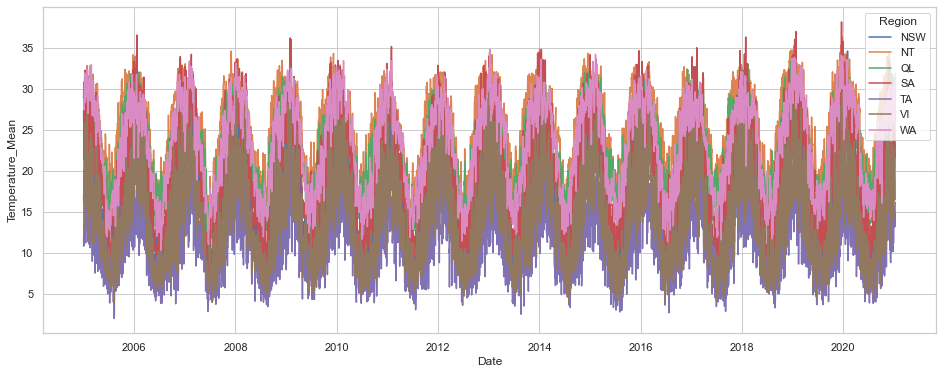

In [55]:
###Now, to Visualize Data taking Average Temperature 

plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
geo = sns.lineplot(x="Date", y="Temperature_Mean",hue='Region', data=weather_df)

In [ ]:
#Visualize Mean of Soilwatercontent
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
geo = sns.lineplot(x="Date", y="SoilWaterContent_Mean",hue='Region', data=weather_df)


### Historical Weather Forecast Data

In [ ]:
#Reading file
df_forecast = pd.read_csv("HistoricalWeatherForecasts.csv")

df_forecast['Date'] = pd.to_datetime(df_forecast['Date'])

df_forecast.head()

In [ ]:
### Forecast predictions cecking for each day

df_forecast['Lead time'].unique()

In [ ]:
#Data Selection by Taking into a Single Region - Monthly
date1 = '2020-01-01'
date2='2020-01-31'

forecast_NSW = df_forecast[(df_forecast['Parameter']== 'Temperature') & (df_forecast['Region']== region1)]
forecast_NSW_1 = forecast_NSW.set_index(['Date'])
forecast_NSW_2 = forecast_NSW_1.loc[date1:date2]
forecast_NSW_2.head()

### Visualize to compare

In [ ]:
#Observation in a same period

weather_df_NSW = weather_df[weather_df['Region']=='NSW']

weather_df_NSW = weather_df_NSW.set_index(['Date'])
observation_1 = weather_df_NSW.loc[date1:date2]
observation_1.head()


In [ ]:
[fig,ax] = plt.subplots(1, figsize=(16, 8))

observation_1['Temperature_Mean'].plot();

forecast_NSW_2['mean()'][forecast_NSW_2['Lead time']== 5].plot();
forecast_NSW_2['mean()'][forecast_NSW_2['Lead time']== 10].plot();
forecast_NSW_2['mean()'][forecast_NSW_2['Lead time']== 15].plot();

ax.legend(['observed T','5 day lead time','10 day lead time','15 day lead time']);

### Future Analysis:The above analysis of Historical Weather Forecast Data is the KEY to builds Model to predict before the Bushfire Happen!

In [ ]:
# Now, Merging the Weather Data & Historical Forecast together
df_all = df_wildfires.merge(weather_df, how='left', on=['Date', 'Region'])

df_all.head()

In [ ]:
print(df_all)

In [ ]:
# Transpose the Data
df_all.describe().transpose()

In [ ]:
#Taking NSW DataFrame
df_NSW = df_all[df_all['Region']=='NSW']
df_NSW.head()

### Region-wise Data Distribution

In [ ]:
plt.figure(figsize=(12, 12))
sns.set(style="whitegrid")

geo = sns.displot(data=df_all, x="Estimated_fire_area", hue="Region", kind="kde", log_scale=True)

In [ ]:
#Visualization on Average Precepitation
plt.figure(figsize=(12, 12))
sns.set(style="whitegrid")
geo = sns.displot(data=df_all, x="Precipitation_Mean", hue="Region", kind="kde")

In [ ]:
#Tofind Wind Speed
plt.figure(figsize=(12, 12))
sns.set(style="whitegrid")
geo = sns.displot(data=df_all, x="WindSpeed_Max", hue="Region", kind="kde")

### Now, to find the Correlation 

In [ ]:
df_correlation = df_all.drop(['Region', 'Date', 'Mean_confidence', 'Std_confidence','Var_confidence','Count', 'Replaced'], axis=1).copy()

plt.figure(figsize = (20, 12))
sns.heatmap(df_correlation.corr(), cmap = "coolwarm", annot= True, vmin = 0, vmax = 1)

In [ ]:
### Average Solar Radioation Vs. Relative Humidity
sns.jointplot(x='RelativeHumidity_Mean', y='SolarRadiation_Mean', data=df_all, kind="reg")

In [ ]:
sns.lmplot(x='RelativeHumidity_Mean', y='SolarRadiation_Mean', hue='Region', data=df_all)

In [ ]:
sns.lmplot(x='Temperature_Mean', y='SolarRadiation_Mean', hue='Region', data=df_all)

In [ ]:
sns.lmplot(x='WindSpeed_Max', y='Estimated_fire_area', hue='Region', data=df_all)

In [ ]:
print(df_all)

In [ ]:
import pandas as pd 
import numpy as np 

df_all_new = pd.DataFrame(df_all, columns=['Date','Region','Estimated_fire_area'])#create DataFrame 
print("Original DataFrame:") 
print(df_all_new) 

df_all_new.to_csv('df_all.csv',index=True,header=True) 
new_df = pd.read_csv('df_all_new.csv') 
print(new_df) 

In [ ]:
df_all.head()